In [5]:
# Load the dataset
import pandas as pd
forest_data = pd.read_csv('C:/Users/clare/Downloads/Machine Learning/Assignment/forestdata.csv')

# Display the first few rows of the dataframe to understand its structure and types of data it contains
forest_data.head()

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
0,5,13.11,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,afternoon,1
1,7,11.99,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,morning,0
2,6,12.91,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,night,0
3,5,12.06,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,afternoon,1
4,2,15.06,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,morning,1


In [7]:
# Displaying the data types of all columns in the dataset, including the target variable
data_types = forest_data.dtypes

data_types


collector.id        int64
c.score           float64
l.score           float64
rain              float64
tree.age          float64
surface.litter    float64
wind.intensity    float64
humidity          float64
tree.density      float64
month               int64
time.of.day        object
fire                int64
dtype: object

Data Preparation: Detection of Missing Values

In [4]:
# Check for missing values in the dataset
missing_values = forest_data.isnull().sum()

# Display missing values count for each column
missing_values

collector.id      0
c.score           0
l.score           1
rain              1
tree.age          1
surface.litter    0
wind.intensity    1
humidity          3
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64

Plotting Histograms

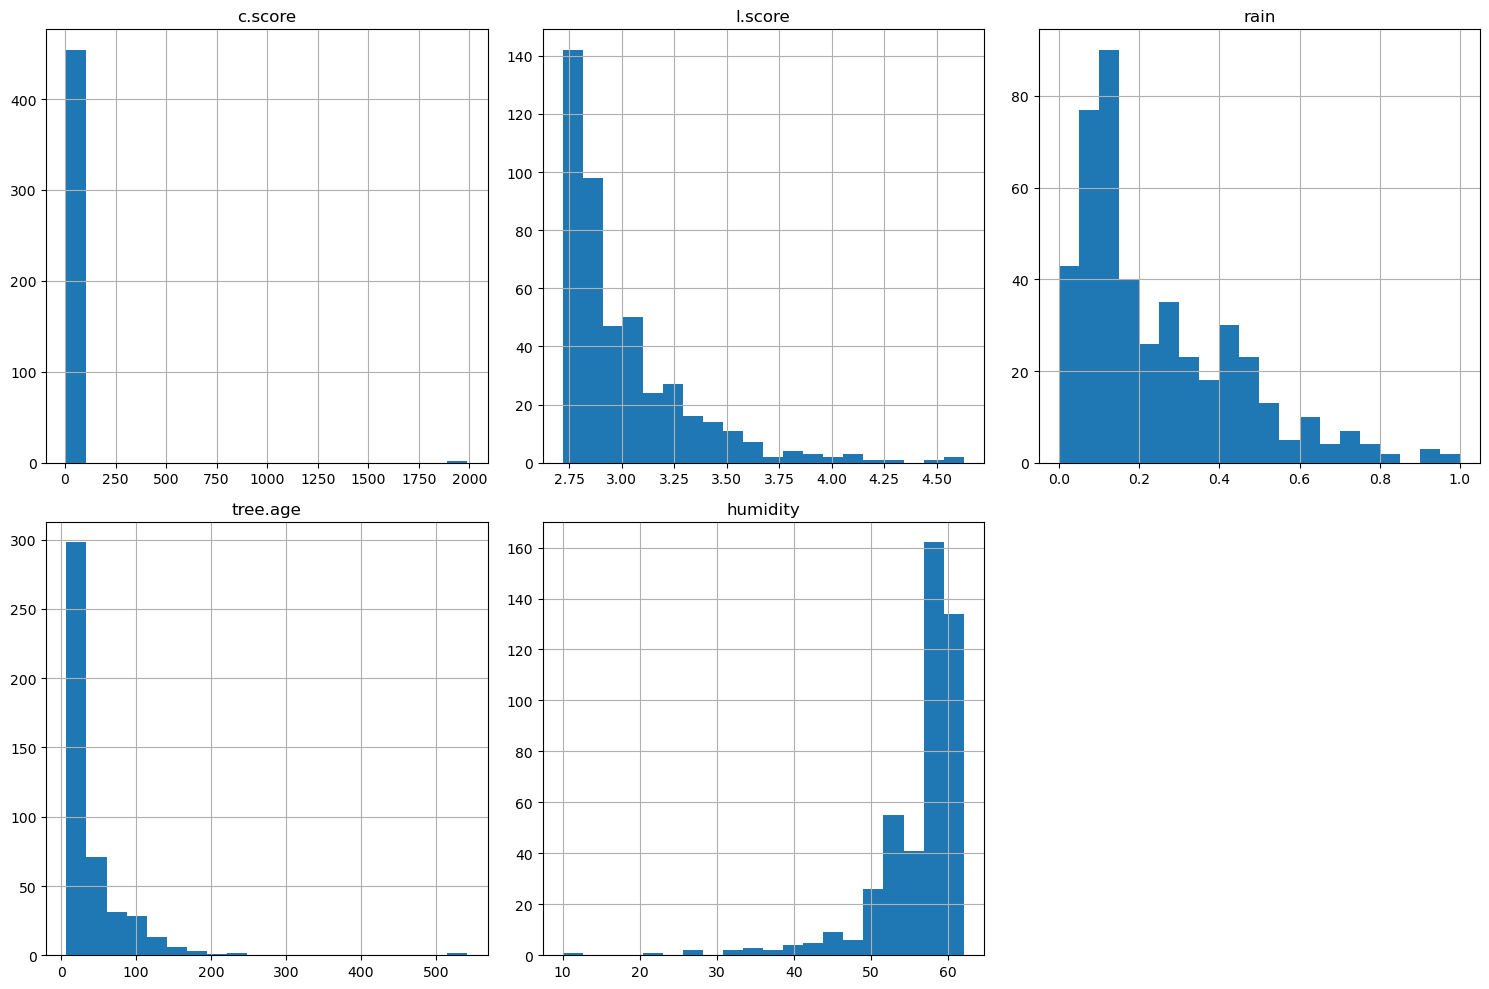

In [5]:
import matplotlib.pyplot as plt

# Selecting columns for histogram plotting
columns_to_plot = ['c.score', 'l.score', 'rain', 'tree.age', 'humidity']

# Plotting histograms for selected columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    forest_data[column].hist(bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

Data Cleaning Actions:Imputation

In [6]:
# Imputing missing values with the median for the specified columns
for column in ['l.score', 'rain', 'tree.age', 'wind.intensity', 'humidity']:
    median_value = forest_data[column].median()
    forest_data[column].fillna(median_value, inplace=True)

# Verify the imputation by checking for missing values again
missing_values_after_imputation = forest_data.isnull().sum()
missing_values_after_imputation


collector.id      0
c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64

 Encoding the categorical variables and preparing the dataset for model training

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Encoding categorical variables using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(forest_data[['month', 'time.of.day']])

# Creating a dataframe from the encoded variables
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['month', 'time.of.day']))

# Concatenating the encoded dataframe with the original dataframe (excluding the original categorical columns)
forest_data_encoded = pd.concat([forest_data.drop(['month', 'time.of.day'], axis=1), encoded_df], axis=1)

# Splitting the dataset into features (X) and target (y)
X = forest_data_encoded.drop(['fire', 'collector.id'], axis=1)  # excluding 'collector.id' as it's not predictive
y = forest_data_encoded['fire']

# Splitting the data into training and test sets with a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((319, 24), (137, 24), (319,), (137,))

Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initializing and training the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluating the logistic regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
confusion_logreg = confusion_matrix(y_test, y_pred_logreg)

accuracy_logreg, confusion_logreg


(0.9051094890510949,
 array([[72,  5],
        [ 8, 52]], dtype=int64))

Decison Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Initializing and training the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting on the test set
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluating the decision tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
confusion_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

accuracy_decision_tree, confusion_decision_tree


(0.8686131386861314,
 array([[69,  8],
        [10, 50]], dtype=int64))

 Developing and evaluating a neural network model

In [11]:
from sklearn.neural_network import MLPClassifier

# Initializing and training the neural network model
neural_network = MLPClassifier(max_iter=1000, random_state=42)
neural_network.fit(X_train, y_train)

# Predicting on the test set
y_pred_neural_network = neural_network.predict(X_test)

# Evaluating the neural network model
accuracy_neural_network = accuracy_score(y_test, y_pred_neural_network)
confusion_neural_network = confusion_matrix(y_test, y_pred_neural_network)

accuracy_neural_network, confusion_neural_network


(0.8759124087591241,
 array([[68,  9],
        [ 8, 52]], dtype=int64))